In [2]:
import os
os.chdir("..")
print("Current working directory:", os.getcwd())

Current working directory: /home/smokehappiest/cnn-age-recognize


In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

class ResNetAgeRegressor(torch.nn.Module):
    def __init__(self):
        super().__init__()
        base = models.resnet50(weights=models.ResNet50_Weights.IMAGENET1K_V2)
        num_ftrs = base.fc.in_features
        base.fc = torch.nn.Identity()
        self.features = base
        self.head = torch.nn.Sequential(
            torch.nn.Linear(num_ftrs, 512),
            torch.nn.ReLU(),
            torch.nn.Dropout(0.3),
            torch.nn.Linear(512, 1)
        )

    def forward(self, x):
        x = self.features(x)
        return self.head(x)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = ResNetAgeRegressor().to(device)
model.load_state_dict(torch.load("best_resnet50_age.pth", map_location=device))
model.eval()


ResNetAgeRegressor(
  (features): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential

In [4]:
infer_tfms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
def predict_age(image_path):
    img = Image.open(image_path).convert('RGB')
    tensor = infer_tfms(img).unsqueeze(0).to(device)
    with torch.no_grad():
        pred = model(tensor).item()
    return pred

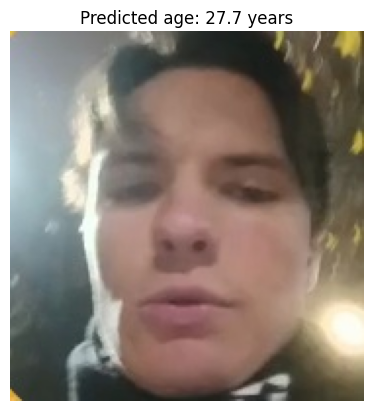

In [11]:
img_path = "/tmp/photo.jpg"
age_pred = predict_age(img_path)

plt.imshow(Image.open(img_path))
plt.axis('off')
plt.title(f"Predicted age: {age_pred:.1f} years")
plt.show()

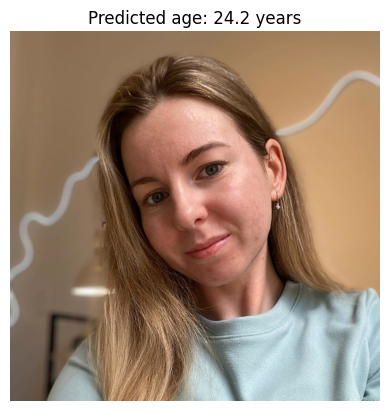

In [8]:
img_path = "/tmp/sister_photo.jpg"
age_pred = predict_age(img_path)

plt.imshow(Image.open(img_path))
plt.axis('off')
plt.title(f"Predicted age: {age_pred:.1f} years")
plt.show()

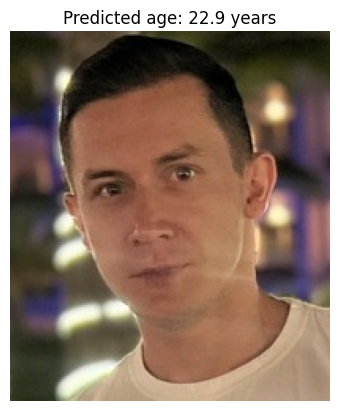

In [10]:
img_path = "/tmp/my_love.jpg"
age_pred = predict_age(img_path)

plt.imshow(Image.open(img_path))
plt.axis('off')
plt.title(f"Predicted age: {age_pred:.1f} years")
plt.show()